<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_Implementasi_Python_Murni_Model_ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementasi Python Murni Model ER ($G(n, p)$)

Tujuan kita adalah membuat matriks konektivitas (adjacency matrix) untuk jaringan acak **Erdős–Rényi** dengan $n$ simpul dan probabilitas sisi $p$, tanpa menggunakan *library* graf eksternal seperti NetworkX.

### Block 1: Setup dan Definisi Parameter

Kita akan mendefinisikan parameter dasar untuk jaringan kita dan mengimpor *library* yang kita butuhkan: `numpy` (untuk operasi matriks dan inisialisasi) dan `random` (untuk simulasi probabilitas).


In [1]:
# Import library yang dibutuhkan
import numpy as np
import random
import matplotlib.pyplot as plt # Untuk visualisasi (opsional)

# --- Parameter Model ER ---
# [n] Jumlah simpul (nodes) dalam jaringan
# Kita ambil 10 simpul agar mudah divisualisasikan
n = 10

# [p] Probabilitas terbentuknya sisi (edge) antara dua simpul
# Kita ambil p = 0.3. Artinya, ada 30% kemungkinan setiap pasangan simpul terhubung.
p = 0.3

print(f"Membuat graf ER G(n={n}, p={p})")

Membuat graf ER G(n=10, p=0.3)


### Block 2: Inisialisasi Matriks Adjacency

Jaringan akan direpresentasikan sebagai **Matriks Adjacency** $A$, di mana $A_{ij} = 1$ jika ada sisi antara simpul $i$ dan $j$, dan $0$ jika tidak ada. Karena ini adalah graf tak berarah (*undirected*), matriks harus simetris.

In [2]:
# Inisialisasi matriks adjacency (A) berukuran n x n dengan nilai nol.
# Matriks ini akan menyimpan koneksi jaringan.
A = np.zeros((n, n), dtype=int)

print(f"Matriks Adjacency awal ({n}x{n}):\n{A}")

Matriks Adjacency awal (10x10):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


### Block 3: Proses Generasi Graf (Probabilitas Sisi)

Ini adalah inti dari model ER. Kita akan mengiterasi setiap pasangan simpul yang mungkin dan menggunakan probabilitas $p$ untuk menentukan apakah sebuah sisi akan terbentuk.

In [3]:
# Iterasi melalui setiap pasangan simpul (i, j)
# Kita hanya perlu mengisi matriks di atas diagonal (i < j) karena graf tak berarah
for i in range(n):
    for j in range(i + 1, n):
        # [random.random()] menghasilkan angka float acak antara 0.0 dan 1.0.
        # Jika angka acak ini lebih kecil dari 'p', maka sisi terbentuk.
        if random.random() < p:

            # Jika sisi terbentuk (probabilitas terpenuhi):
            # 1. Set A[i, j] = 1. (Simpul i terhubung ke simpul j)
            A[i, j] = 1

            # 2. Set A[j, i] = 1. (Simetri: Karena graf tak berarah)
            A[j, i] = 1

print("\n--- Hasil Akhir Generasi Graf ER ---")
print(f"Matriks Adjacency G(10, 0.3) yang Terbentuk:\n{A}")


--- Hasil Akhir Generasi Graf ER ---
Matriks Adjacency G(10, 0.3) yang Terbentuk:
[[0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 1 1 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


### Block 4: Penghitungan Metrik Sederhana (Opsional)

Untuk memvalidasi, kita hitung beberapa metrik dasar, seperti jumlah total sisi dan derajat rata-rata ($\langle k \rangle$).

In [4]:
# --- Penghitungan Metrik ---

# 1. Total Sisi (m): Jumlah semua '1' di matriks, dibagi 2 (karena terhitung ganda)
# [np.sum(A)] menjumlahkan semua elemen matriks.
m = np.sum(A) // 2

# 2. Derajat Rata-rata (<k>): Jumlah total sisi dibagi jumlah simpul
# [np.sum(A, axis=1)] menjumlahkan '1' per baris, menghasilkan vektor derajat simpul.
derajat_simpul = np.sum(A, axis=1)
k_rata_rata = np.mean(derajat_simpul)

# --- Perkiraan Teoritis ---
# Ekspektasi sisi (E[m]): p * (jumlah_pasangan_mungkin)
# Jumlah pasangan mungkin: n * (n-1) / 2
E_m = p * (n * (n - 1) / 2)
E_k = p * (n - 1)

print(f"\nTotal Sisi (m) Eksperimental: {m}")
print(f"Total Sisi (m) Teoritis (E[m]): {E_m:.2f}")
print(f"Derajat Rata-rata Eksperimental: {k_rata_rata:.2f}")
print(f"Derajat Rata-rata Teoritis (E[k]): {E_k:.2f}")

# Catatan: Nilai Eksperimental akan mendekati Teoritis seiring n bertambah besar!


Total Sisi (m) Eksperimental: 11
Total Sisi (m) Teoritis (E[m]): 13.50
Derajat Rata-rata Eksperimental: 2.20
Derajat Rata-rata Teoritis (E[k]): 2.70


### Block 5: Visualisasi Graf yang Dihasilkan

Kita tidak bisa menggunakan fungsi bawaan untuk menggambar graf (seperti `nx.draw`), jadi kita akan menggunakan **Matplotlib** untuk memplot simpul dan sisi berdasarkan Matriks *Adjacency* ($A$) yang sudah kita hitung. Visualisasi ini akan menggunakan tata letak lingkaran (*circular layout*) agar lebih mudah dibaca.

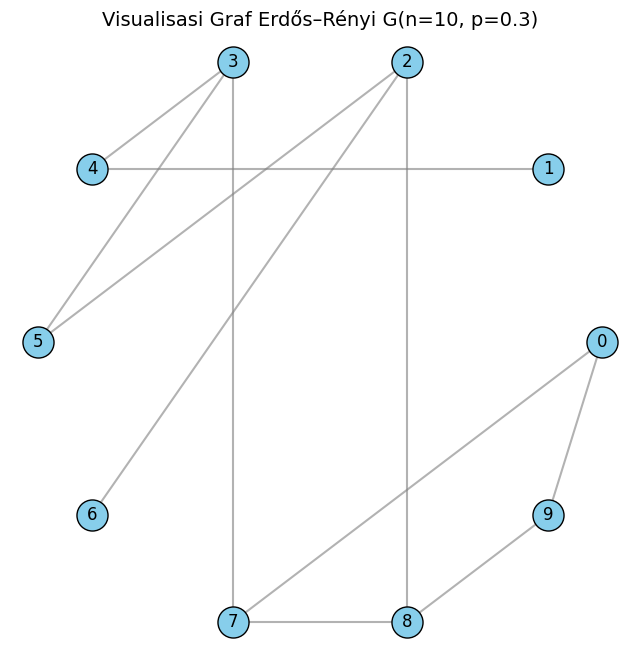

In [5]:
# Import kembali matplotlib.pyplot untuk visualisasi
import matplotlib.pyplot as plt

# --- Setup Posisi Simpul (Circular Layout) ---

# Tentukan posisi simpul (nodes) dalam lingkaran
# Ini adalah cara sederhana untuk menempatkan simpul secara melingkar
sudut = np.linspace(0, 2 * np.pi, n, endpoint=False)
posisi_x = np.cos(sudut)
posisi_y = np.sin(sudut)
posisi_simpul = np.array([posisi_x, posisi_y]).T

# --- Pengaturan Plot ---
plt.figure(figsize=(8, 8))
plt.title(f"Visualisasi Graf Erdős–Rényi G(n={n}, p={p})", fontsize=14)

# 1. Gambar Simpul (Nodes)
# [plt.scatter] memplot titik (simpul) pada posisi_simpul
plt.scatter(posisi_simpul[:, 0], posisi_simpul[:, 1],
            s=500, # Ukuran simpul
            c='skyblue', # Warna simpul
            edgecolors='black',
            zorder=3) # zorder memastikan simpul berada di atas garis

# Tampilkan label/ID simpul (0 hingga n-1)
for i in range(n):
    plt.text(posisi_simpul[i, 0], posisi_simpul[i, 1], str(i),
             color='black',
             fontsize=12,
             ha='center', va='center')

# 2. Gambar Sisi (Edges)
# Iterasi lagi melalui matriks A, hanya untuk simpul yang terhubung (A[i, j] == 1)
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] == 1:
            # Sisi terbentuk, gambar garis antara posisi_simpul[i] dan posisi_simpul[j]
            x_coords = [posisi_simpul[i, 0], posisi_simpul[j, 0]]
            y_coords = [posisi_simpul[i, 1], posisi_simpul[j, 1]]

            # [plt.plot] menggambar garis (sisi)
            plt.plot(x_coords, y_coords,
                     color='gray',
                     alpha=0.6, # Transparansi
                     linestyle='-',
                     linewidth=1.5,
                     zorder=1) # zorder memastikan garis berada di bawah simpul

# Bersihkan sumbu x dan y agar fokus pada graf
plt.axis('off')
plt.show()